In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('marine_life_dataset.csv')

df.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Population,Water Temperature (°C),Nutrient Levels
count,1000.000000,1000.000000,1000.000000
mean,49.809000,24.980282,0.507339
std,28.396529,2.905684,0.227108
min,1.000000,20.017426,0.100145
25%,26.000000,22.482619,0.313938
50%,50.000000,24.785344,0.505267
75%,74.000000,27.505758,0.708002
max,99.000000,29.992590,0.899894


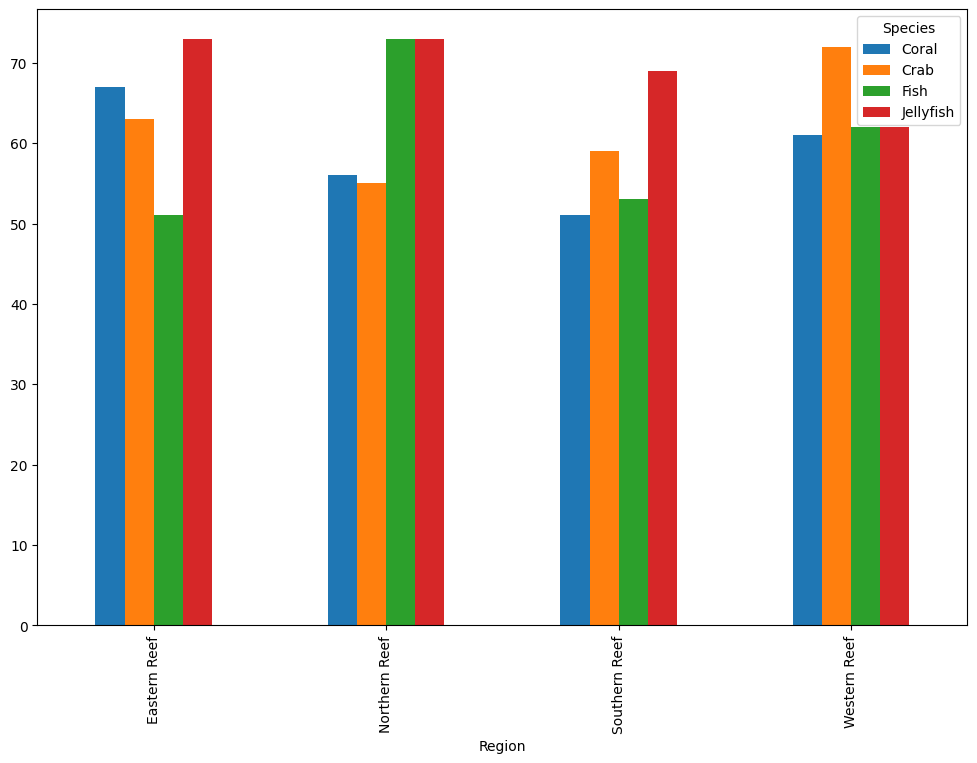

In [8]:
df_spec = df.groupby('Region')['Species'].value_counts().unstack().reset_index()

df_spec.set_index('Region').plot(kind='bar', xlabel='Region', figsize=(12,8))
plt.show()

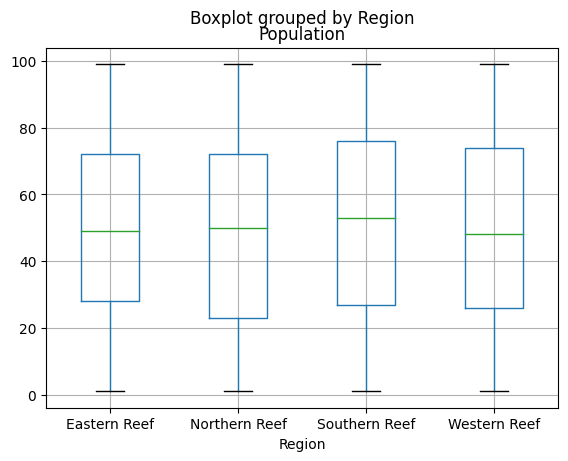

In [9]:
df.boxplot(by='Region', column='Population')
plt.show()

In [10]:
df.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


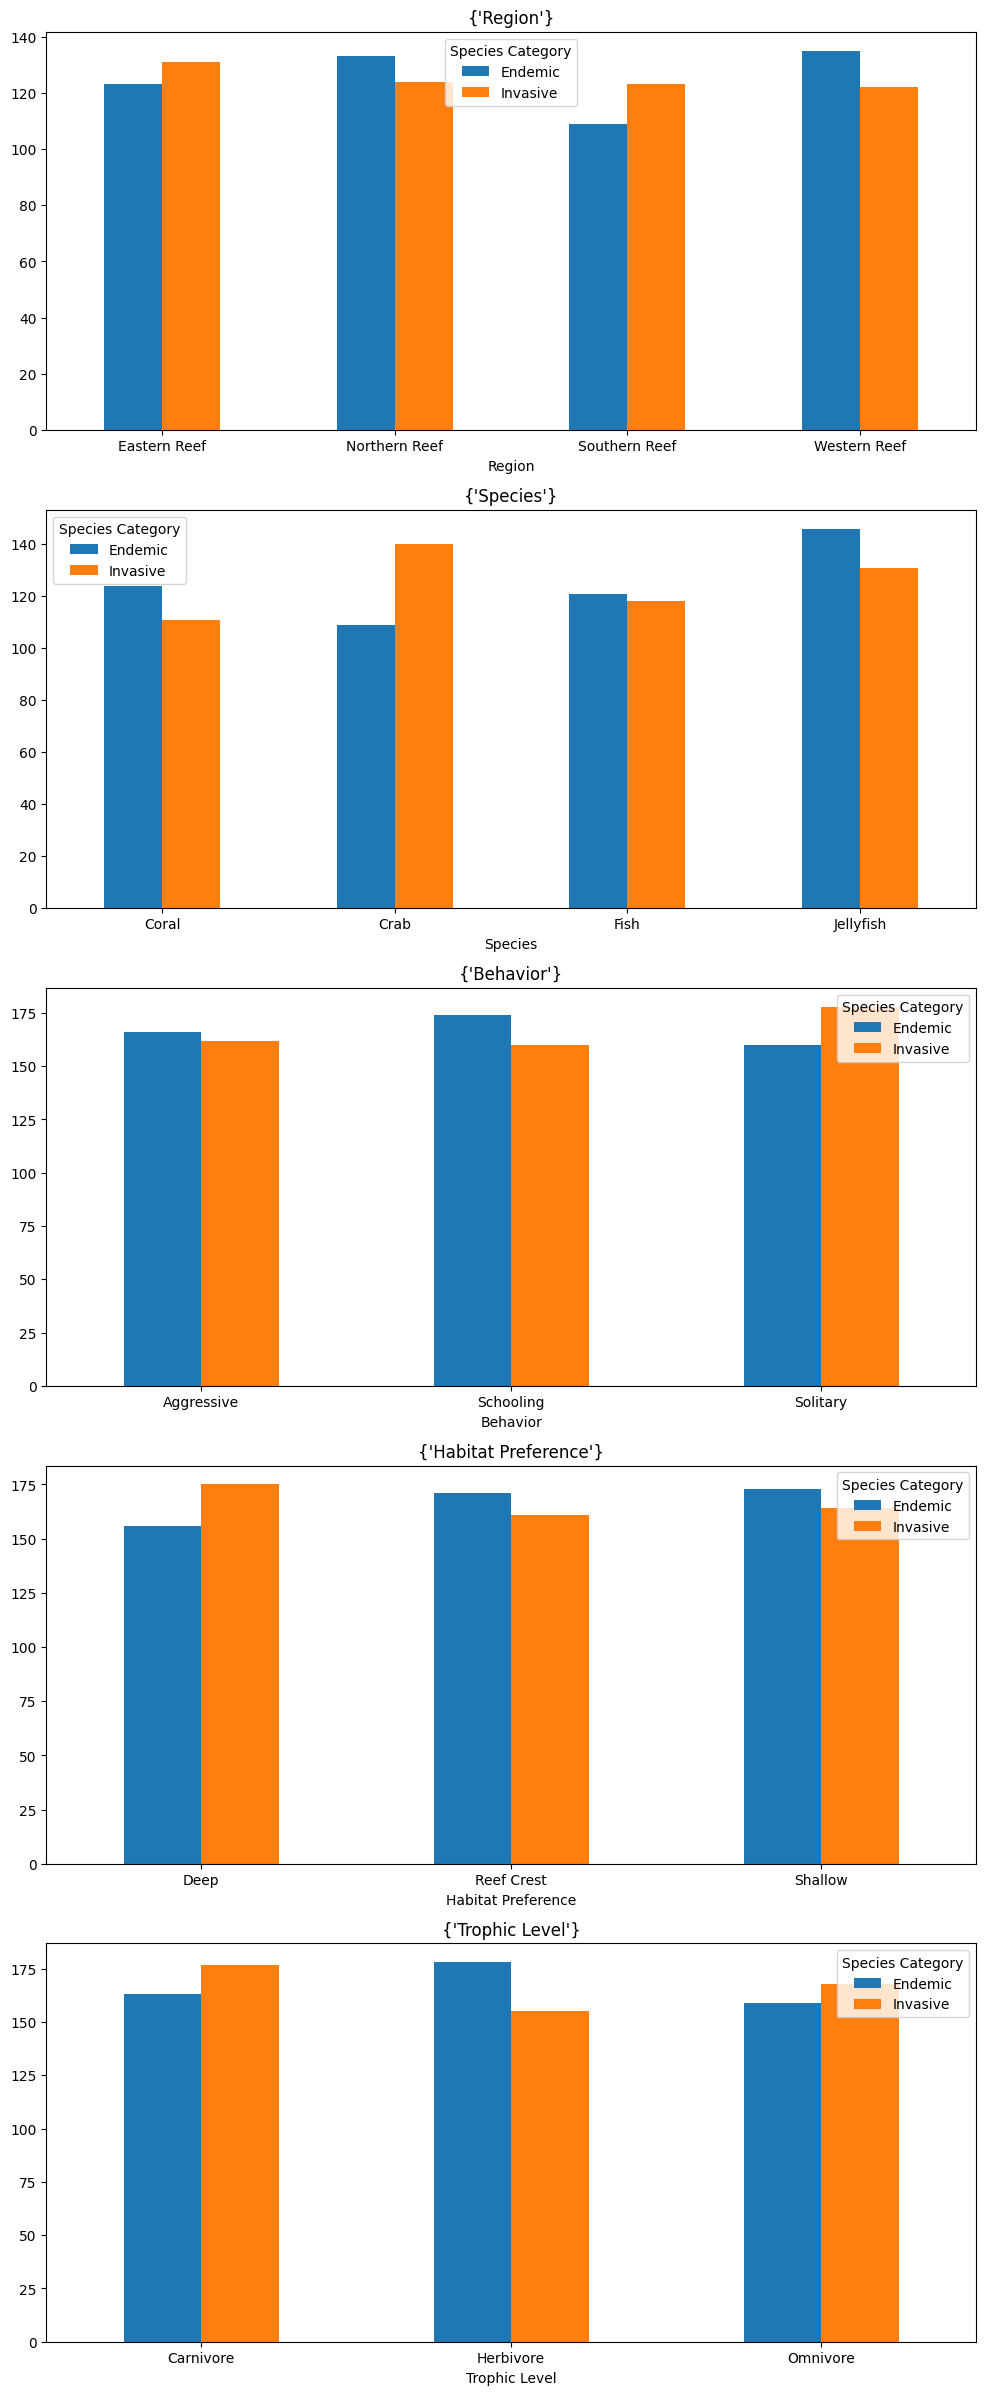

In [11]:
variables = ['Region','Species','Behavior','Habitat Preference','Trophic Level']

n_vars = len(variables)
fig, axes = plt.subplots(nrows=n_vars, figsize=(12,6*n_vars))

for i, var in enumerate(variables):
    ax = axes[i]
    df_grp = df.groupby(var)['Species Category'].value_counts().unstack().reset_index()
    df_grp.set_index(var).plot(kind='bar', ax=ax)
    ax.set_title({var})
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

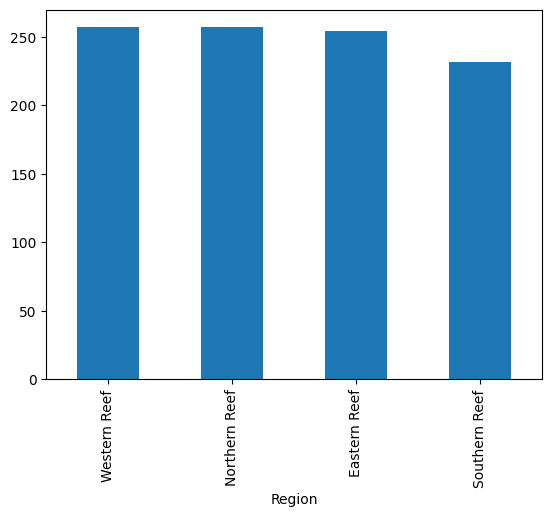

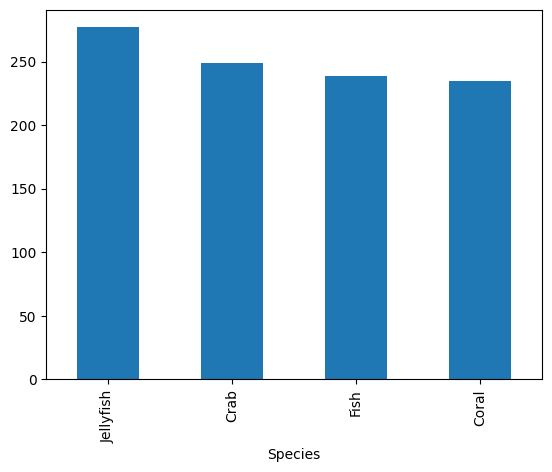

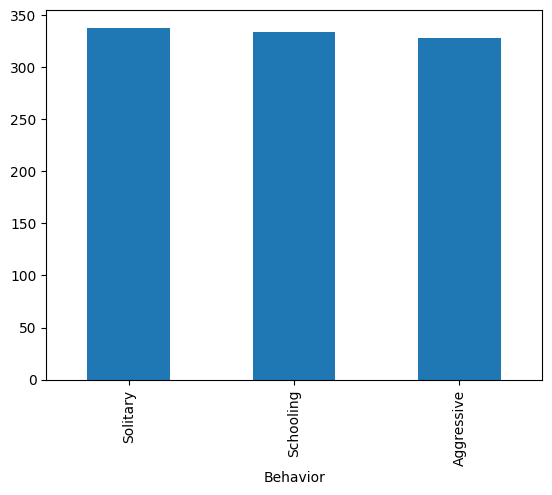

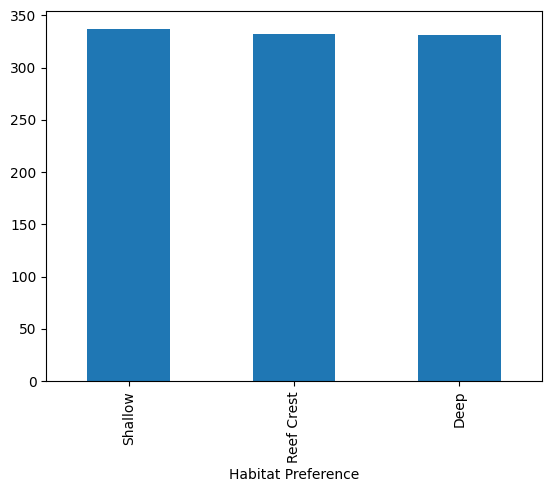

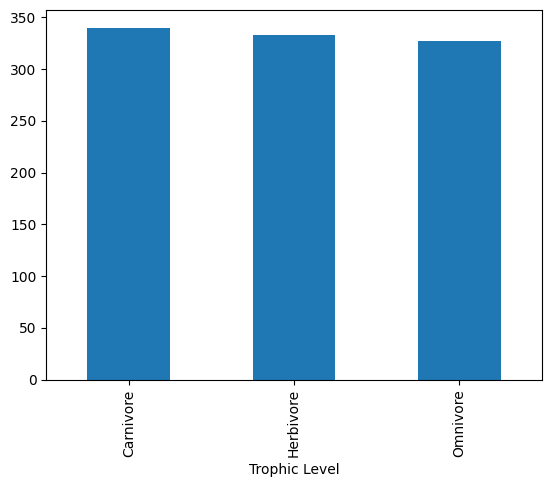

In [13]:
variables = ['Region','Species','Behavior','Habitat Preference','Trophic Level']

for var in variables:
    values = df[var].value_counts()
    values.plot(kind='bar')
    plt.show()

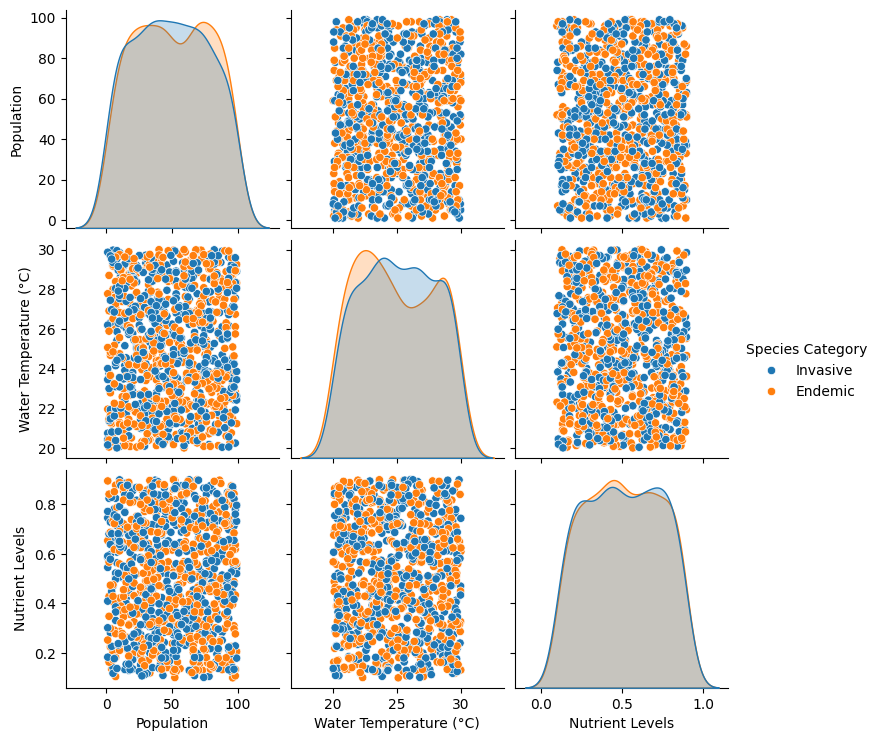

In [ ]:
sns.pairplot(df, hue='Species Category')
plt.show()

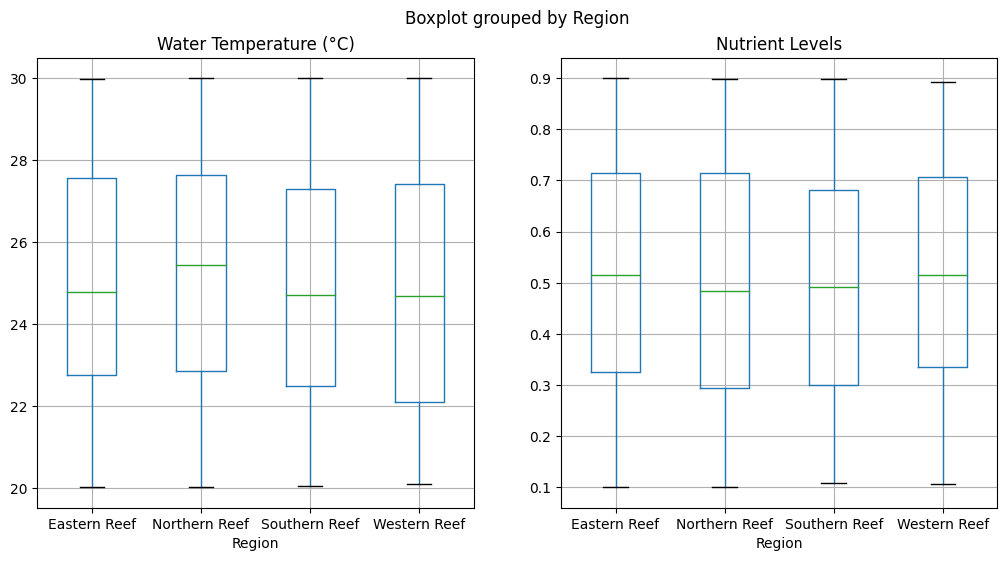

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

variables = ['Water Temperature (°C)','Nutrient Levels']

for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(by='Region', column=var, ax=ax)

In [ ]:
df['Trophic Level'].value_counts()
trophic_map = {
    'Herbivore': -1,
    'Omnivore': 0,
    'Carnivore': 1
}

In [ ]:
df['Trophic Level'] = df['Trophic Level'].map(trophic_map)
df['Trophic Level'].value_counts()

Trophic Level
 1    340
-1    333
 0    327
Name: count, dtype: int64

In [ ]:
df['Species Category'].value_counts()

Species Category
Invasive    500
Endemic     500
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['Species Category'] = enc.fit_transform(df['Species Category'])

df['Species Category'].value_counts()

Species Category
1    500
0    500
Name: count, dtype: int64

In [ ]:
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# df.head()

df = df[(df['Population'] > lower_bound) & (df['Population'] < upper_bound)]

In [ ]:
df = pd.get_dummies(df, columns=['Region','Species','Behavior','Habitat Preference'], dtype=int)

df.head()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,33,1,-1,25.334903,0.306537,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,15,1,1,21.734394,0.421331,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2,8,1,1,25.429249,0.713816,1,0,0,0,0,0,0,1,0,1,0,1,0,0
3,78,1,1,27.366580,0.343183,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,61,0,-1,23.642494,0.349990,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

log_transform = FunctionTransformer(np.log1p, validate=True)
minmax = MinMaxScaler()

df[['Water Temperature (°C)','Nutrient Levels','Population']] = log_transform.fit_transform(df[['Water Temperature (°C)','Nutrient Levels','Population']])

df.head()


,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,3.526361,1,-1,3.270895,0.267380,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,2.772589,1,1,3.123879,0.351594,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2,2.197225,1,1,3.274471,0.538723,1,0,0,0,0,0,0,1,0,1,0,1,0,0
3,4.369448,1,1,3.345212,0.295042,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,4.127134,0,-1,3.204472,0.300097,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
df[['Water Temperature (°C)','Nutrient Levels','Population']] = minmax.fit_transform(df[['Water Temperature (°C)','Nutrient Levels','Population']])

df.head()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,0.724232,1,-1,0.580704,0.314699,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,0.531551,1,1,0.202183,0.468836,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2,0.384476,1,1,0.589911,0.811340,1,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0.939744,1,1,0.772046,0.365330,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0.877803,0,-1,0.409686,0.374582,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X = df.drop(columns='Species Category')
y = df['Species Category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

param_grid = {
    'C': [0.1,1,10],
    'max_iter': [100,500,1000]
}

grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='accuracy')

grid.fit(X_train, y_train)

est = grid.best_estimator_

print(est)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=0.1)
{'C': 0.1, 'max_iter': 100}
0.5357142857142858


In [ ]:
from sklearn.metrics import classification_report

y_pred = est.predict(X_test)

target_names = ['Invasive','Endemic']

print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    Invasive       0.48      0.53      0.51       146
     Endemic       0.51      0.45      0.48       154

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



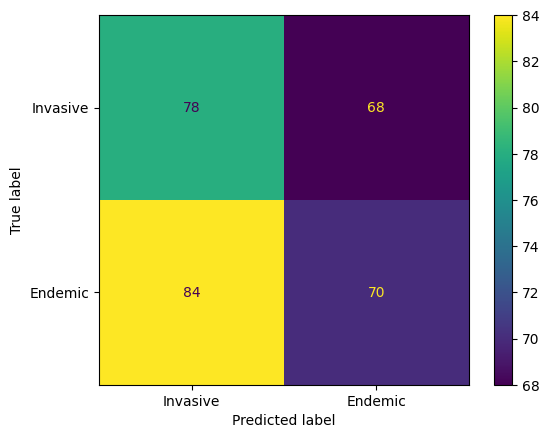

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.show()

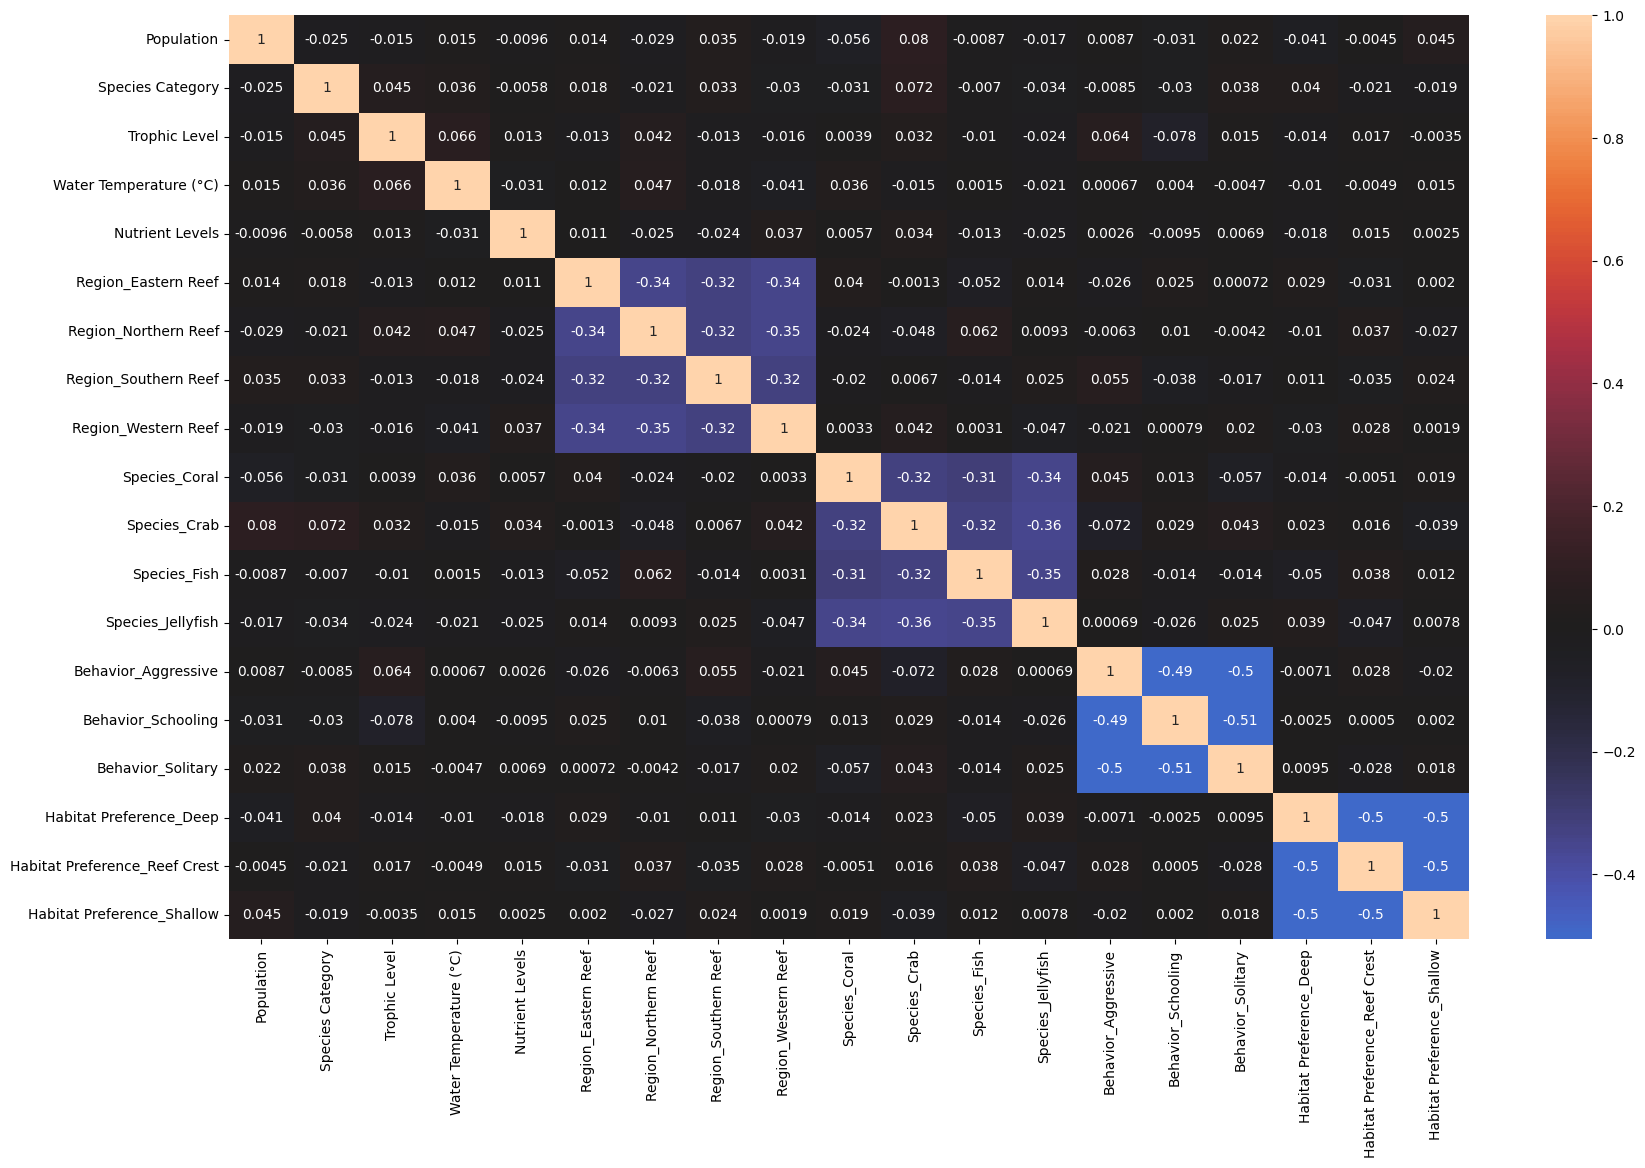

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()